# Weather

### Analysis

1. Temperature arround the latitude 0 is higher and it drops down as we go away. As it is summer in north it is higer on Northen globe 
2. Looks like Humidity is mostly towards higher side around the globe. 
3. Cloudiness is scattered all over

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

weather_df = pd.DataFrame([])

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        weather_df = weather_df.append(pd.DataFrame({"City": city, "latitude":lat_lng[0], "longitude":lat_lng[1]}, index=[0]), ignore_index=True)


In [3]:
# Print the city count to confirm sufficient count
weather_df.head()

,City,latitude,longitude
0,ahipara,-31.351576,172.896122
1,grand river south east,-19.772311,72.725226
2,mys shmidta,77.692484,-174.162305
3,kimamba,-6.858007,37.144036
4,cidreira,-53.666445,-27.370883


## Perform API Calls

In [17]:
# OpenWeatherMap API Key

units = "Imperial"
params = {"appid":  api_keys.api_key,
         "units" : units,
         "q" : ""}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"


In [18]:
#set the DataFrme with empty values
weather_df['Temperature'] = np.nan
weather_df['Humidity'] = np.nan
weather_df['Cloudiness'] = np.nan
weather_df['Wind Speed'] = np.nan

In [22]:
#iterate over the citys and get data from each city
for index, row in weather_df.iterrows():
    params["q"]= row["City"]
    #Call API to get Data
    response = requests.get(url, params=params).json()
    ##print(json.dumps(response, indent=4))
    #break
    #Fill the data
    try:
        weather_df.loc[index,"Temperature"] = response["main"]["temp_max"]  
        weather_df.loc[index,"Humidity"] = response["main"]["humidity"]      
        weather_df.loc[index,"Cloudiness"] = response["clouds"]["all"]    
        weather_df.loc[index,"Wind Speed"] = response["wind"]["speed"] 
        #Print City Index and City
        print(f"Processing Record {index} | {row['City']}")
        print (f'{url}units={params["units"]}APPID=xxxxxxxxx&q{params["q"]}')
    except:
        pass
            

Processing Record 0 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qahipara
Processing Record 3 | kimamba
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qkimamba
Processing Record 4 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qcidreira
Processing Record 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qiqaluit
Processing Record 6 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qarraial do cabo
Processing Record 7 | busselton
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qbusselton
Processing Record 8 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qribeira grande
Processing Record 9 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qbutaritari
Processing Record 10 | saint-p

Processing Record 78 | lebu
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qlebu
Processing Record 79 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qhasaki
Processing Record 80 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qlongyearbyen
Processing Record 82 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qhuarmey
Processing Record 83 | elat
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qelat
Processing Record 84 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qpunta arenas
Processing Record 85 | rock sound
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qrock sound
Processing Record 86 | dikson
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qdikson
Processing Record 87 | colares
http://api.openweatherm

Processing Record 153 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qkirakira
Processing Record 154 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qclyde river
Processing Record 155 | takaungu
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qtakaungu
Processing Record 156 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qkomsomolskiy
Processing Record 157 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qtuatapere
Processing Record 160 | umea
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qumea
Processing Record 161 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qnarsaq
Processing Record 162 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qmehamn
Processing Record 163 | vamvakou
http://

Processing Record 236 | kamalia
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qkamalia
Processing Record 237 | beloha
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qbeloha
Processing Record 238 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qulaanbaatar
Processing Record 239 | pevek
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qpevek
Processing Record 240 | baykit
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qbaykit
Processing Record 241 | french harbor
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qfrench harbor
Processing Record 242 | darhan
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qdarhan
Processing Record 243 | ukiah
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qukiah
Processing Record 244 | balingasay
http://api.open

Processing Record 310 | roald
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qroald
Processing Record 311 | aberdare
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qaberdare
Processing Record 312 | olga
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qolga
Processing Record 313 | saint-louis
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qsaint-louis
Processing Record 314 | camacha
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qcamacha
Processing Record 315 | bolshoye selo
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qbolshoye selo
Processing Record 316 | lokosovo
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qlokosovo
Processing Record 317 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qilulissat
Processing Record 318 | paamiut
http:/

Processing Record 382 | eyrarbakki
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qeyrarbakki
Processing Record 383 | vwawa
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qvwawa
Processing Record 384 | veraval
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qveraval
Processing Record 385 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qpuerto escondido
Processing Record 386 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qzhezkazgan
Processing Record 387 | sorong
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qsorong
Processing Record 388 | sharjah
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qsharjah
Processing Record 389 | chabahar
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qchabahar
Processing Record 390 | hamban

Processing Record 458 | biloela
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qbiloela
Processing Record 459 | aksha
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qaksha
Processing Record 460 | takhtamygda
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qtakhtamygda
Processing Record 461 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qvestmannaeyjar
Processing Record 462 | calvinia
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qcalvinia
Processing Record 463 | nazarovo
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qnazarovo
Processing Record 464 | valentigney
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qvalentigney
Processing Record 465 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qnanortalik
Processing Record 46

Processing Record 534 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qinhambane
Processing Record 535 | veriora
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qveriora
Processing Record 536 | marawi
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qmarawi
Processing Record 537 | puro
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qpuro
Processing Record 538 | san ramon
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qsan ramon
Processing Record 540 | phan thiet
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qphan thiet
Processing Record 541 | acari
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qacari
Processing Record 542 | sorland
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qsorland
Processing Record 543 | sept-iles
http://api.openweath

Processing Record 612 | batticaloa
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qbatticaloa
Processing Record 613 | awbari
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qawbari
Processing Record 614 | leiyang
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qleiyang
Processing Record 616 | new ulm
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qnew ulm
Processing Record 617 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qsan quintin
Processing Record 618 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qhavoysund
Processing Record 619 | port keats
http://api.openweathermap.org/data/2.5/weather?units=ImperialAPPID=xxxxxxxxx&qport keats


In [24]:
#Drop all empty data rows
weather_df = weather_df.dropna()
#Show data
weather_df.head()

,City,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,ahipara,-31.351576,172.896122,57.53,85.0,56.0,11.68
3,kimamba,-6.858007,37.144036,64.55,98.0,92.0,3.18
4,cidreira,-53.666445,-27.370883,50.33,75.0,32.0,15.82
5,iqaluit,61.641117,-69.915027,44.60,81.0,75.0,2.95
6,arraial do cabo,-30.795000,-36.987880,71.60,88.0,75.0,3.36


In [25]:
weather_df.count()

City           555
latitude       555
longitude      555
Temperature    555
Humidity       555
Cloudiness     555
Wind Speed     555
dtype: int64

In [26]:
# Output File (CSV)
import os

outname = 'cities.csv'
outdir = '../output_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)
    
weather_df.to_csv(outdir + "/"+ outname)

### Create the function to plot the graph

In [27]:
# plot_scatter
# x_param : 
# color :
# title: Custom title 
def plot_scatter(x_param, color, title = ""):
    #'Cloudiness (F) vs. Latitude'
    y = weather_df[x_param]
    x = weather_df['latitude']    
    
    #plot the graph
    plt.scatter(x=x, y=y, s= 20, label = x_param, color=color, edgecolor='black' )        
    
    #label
    lgnd = plt.legend(loc="best", numpoints=1, fontsize=10)
    plt.title(title)
    plt.ylabel(x_param)
    plt.xlabel('latitude')
    plt.grid()
    plt.tight_layout()
    
    #set teh file name
    filename = x_param + "vslatitude.png"
    
    # Save Figure
    plt.savefig("../Images/" + filename)
    plt.show()


### Temperature (F) vs. Latitude plot

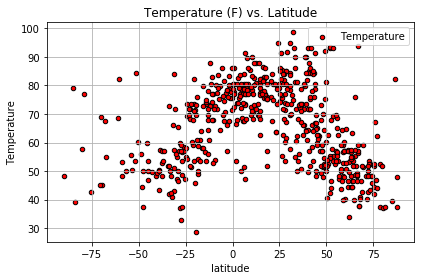

In [28]:
plot_scatter('Temperature', 'red', 'Temperature (F) vs. Latitude')

### Humidity % vs. Latitude plot

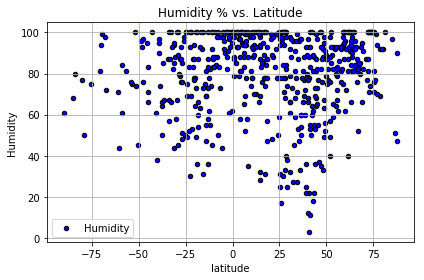

In [29]:
plot_scatter('Humidity', 'blue', 'Humidity % vs. Latitude')

### Cloudiness (%) vs. Latitude

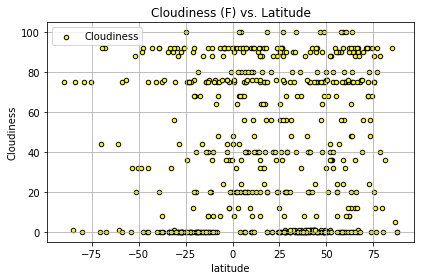

In [30]:
plot_scatter('Cloudiness', 'yellow', 'Cloudiness (F) vs. Latitude')

### Wind Speed (mph) vs. Latitude plot

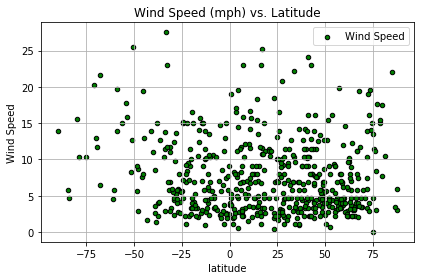

In [31]:
plot_scatter('Wind Speed', 'green', 'Wind Speed (mph) vs. Latitude')